In [1]:
import numpy as np
import scipy.io.wavfile
import librosa
import librosa.display
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile

X = np.load('musdb_spec_inputs.npy')
Y = np.load('musdb_spec_targets.npy')

In [8]:
def show_spectrograms(S_input, S_target, S_pred):
    plt.figure()
    ax1 = plt.subplot(3,1,1)
    librosa.display.specshow(S_input)
    plt.title('Input')
    plt.colorbar(format='%+2.0f dB')

    ax2 = plt.subplot(3,1,2)
    librosa.display.specshow(S_target)
    plt.title('Target')
    plt.colorbar(format='%+2.0f dB')
    
    ax3 = plt.subplot(3,1,3)
    librosa.display.specshow(S_pred)
    plt.title('Prediction')
    plt.colorbar(format='%+2.0f dB')

    plt.tight_layout()
    plt.show()

def spectrogram_to_wavfile(filename, S):
    S = librosa.core.db_to_power(S)
    print('Inverting spectrogram...')
    y = librosa.feature.inverse.mel_to_audio(S)
    print('Creating {}...'.format(filename))
    scipy.io.wavfile.write(filename, 22050, y)
    print('Done')

In [85]:
ix = 10
inp = X[ix]
target = Y[ix]

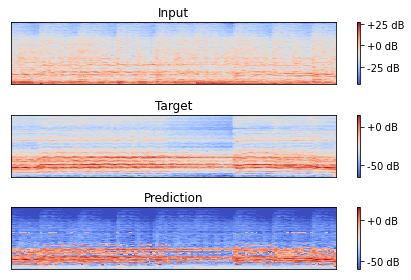

In [86]:
bitmask = (target < -15).astype(int)
pred = inp + (bitmask * -40)
pred = np.maximum(pred, np.ones_like(subset)*-60)

show_spectrograms(inp, target, pred)

In [64]:
# write spectrogram to audio file
spectrogram_to_wavfile('xpred.wav', pred)

Inverting spectrogram...
Creating xpred.wav...
Done


In [87]:
# write all spectrograms to audio files
spectrogram_to_wavfile('xpred.wav', pred)
spectrogram_to_wavfile('xtarget.wav', target)
spectrogram_to_wavfile('xinput.wav', inp)

Inverting spectrogram...
Creating xpred.wav...
Done
Inverting spectrogram...
Creating xtarget.wav...
Done
Inverting spectrogram...
Creating xinput.wav...
Done
